# Image in spatial and frequency domain

In [55]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [56]:
# loading image
img = mpimg.imread('i/solid_background_1.png')

# getting the dft through fft
fft = np.fft.fft2(img)

# White image

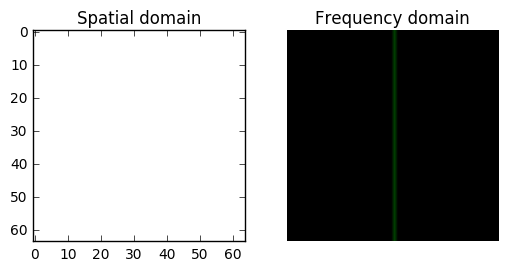

In [57]:
f, (plt1, plt2) = plt.subplots(1, 2)

plt1.axis('on');plt1.set_title('Spatial domain');plt1.imshow(img);
plt2.axis('off');plt2.set_title('Frequency domain');plt2.imshow(np.abs(np.fft.fftshift(fft)));

# White background + ball

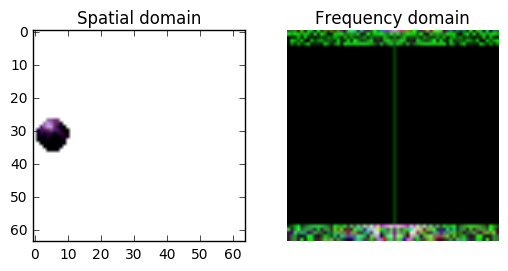

In [58]:
img = mpimg.imread('i/solid_background_ball_1.png')
fft = np.fft.fft2(img)

f, (plt1, plt2) = plt.subplots(1, 2)

plt1.axis('on');plt1.set_title('Spatial domain');plt1.imshow(img);
plt2.axis('off');plt2.set_title('Frequency domain');plt2.imshow(np.abs(np.fft.fftshift(fft)));

# Animation background + ball

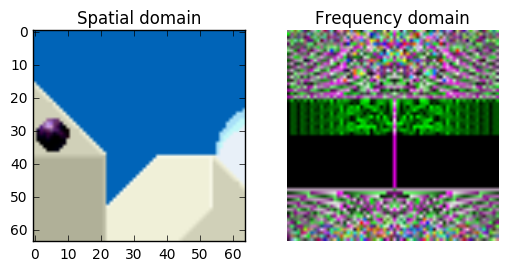

In [59]:
img = mpimg.imread('i/smw_background_ball_1.png')
fft = np.fft.fft2(img)

f, (plt1, plt2) = plt.subplots(1, 2)

plt1.axis('on');plt1.set_title('Spatial domain');plt1.imshow(img);
plt2.axis('off');plt2.set_title('Frequency domain');plt2.imshow(np.abs(np.fft.fftshift(fft)));

# Super mario head

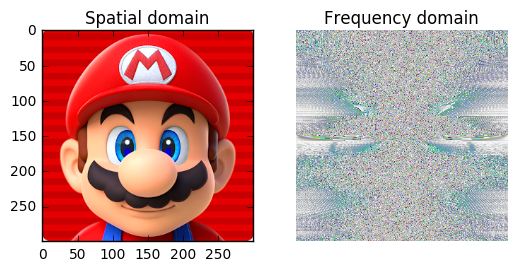

In [60]:
img = mpimg.imread('i/super_mario_head.png')
fft = np.fft.fft2(img)

f, (plt1, plt2) = plt.subplots(1, 2)

plt1.axis('on');plt1.set_title('Spatial domain');plt1.imshow(img);
plt2.axis('off');plt2.set_title('Frequency domain');plt2.imshow(np.abs(np.fft.fftshift(fft)));

# Multiply in frequency domain == convolution in spatial domain

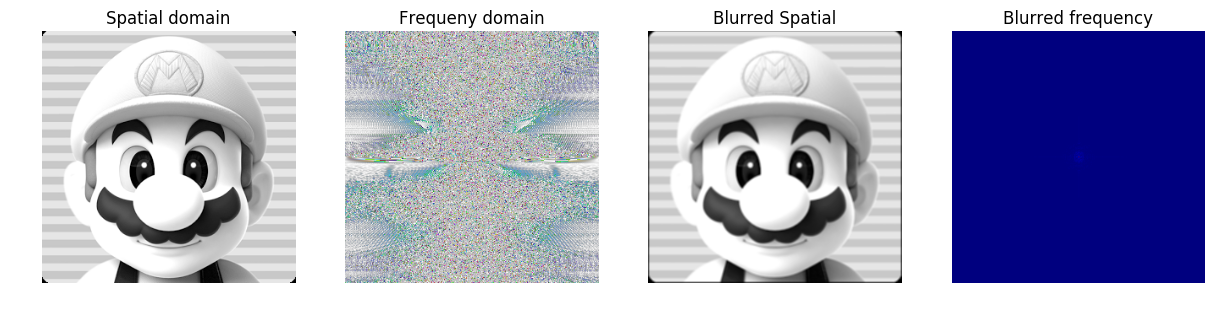

In [61]:
from scipy import signal

img = mpimg.imread('i/super_mario_head.png')
kernel = np.outer(signal.gaussian(3, 2), signal.gaussian(3, 2))
blurred = signal.fftconvolve(img[:,:,0], kernel)

fft_blurred = np.fft.fft2(blurred)
fft_original = np.fft.fft2(img)

f, (plt1, plt2, plt3, plt4) = plt.subplots(1, 4, figsize=(15,15))

#plt1.axis('on');plt1.set_title('Spatial domain');plt1.imshow(kernel);
plt1.axis('off');plt1.set_title('Spatial domain');plt1.imshow(img[:,:,0],cmap='gray');

plt2.axis('off');plt2.set_title('Frequeny domain');plt2.imshow(np.abs(np.fft.fftshift(fft_original)));

plt3.axis('off');plt3.set_title('Blurred Spatial');plt3.imshow(blurred,cmap='gray');

plt4.axis('off');plt4.set_title('Blurred frequency');plt4.imshow(np.abs(np.fft.fftshift(fft_blurred)));

# Back and forth: frequenty and spatial

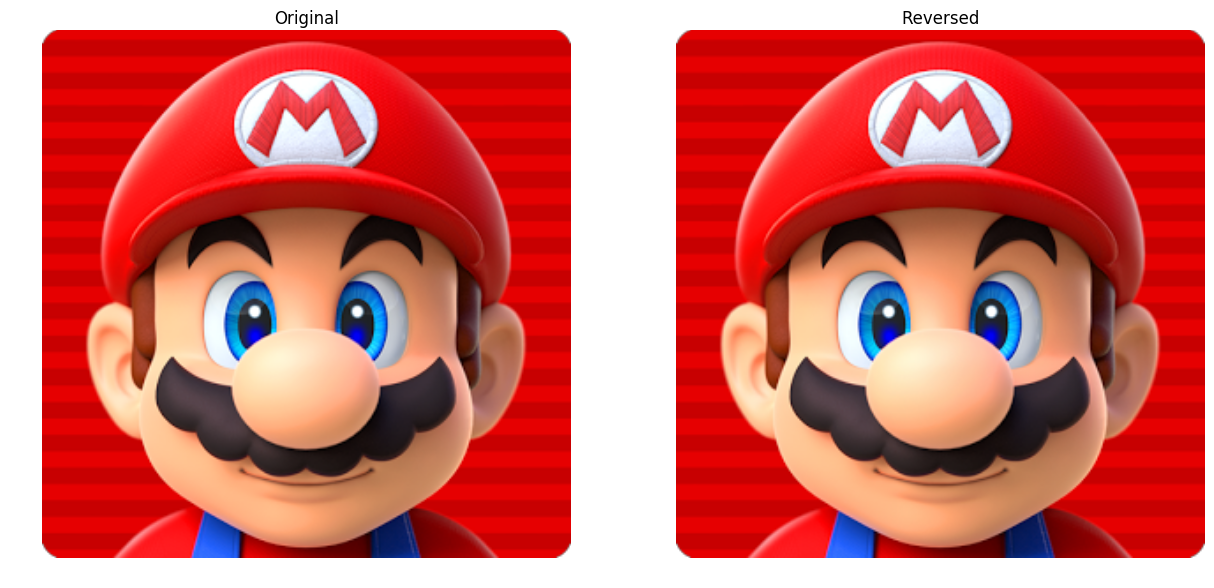

In [62]:
from scipy import signal

img = mpimg.imread('i/super_mario_head.png')
kernel = np.outer(signal.gaussian(3, 2), signal.gaussian(3, 2))
blurred = signal.fftconvolve(img[:,:,0], kernel)

# image in frequency domain
fft_original = np.fft.rfft2(img)

# reverse from frequency to spatial
i_fft_original = np.fft.irfft2(fft_original)

f, (plt1, plt2) = plt.subplots(1, 2, figsize=(15,15))

#plt1.axis('on');plt1.set_title('Spatial domain');plt1.imshow(kernel);
plt1.axis('off');plt1.set_title('Original');plt1.imshow(img, cmap='gray');


plt2.axis('off');plt2.set_title('Reversed');plt2.imshow(i_fft_original);

# Discarding coefficients from frequency domain

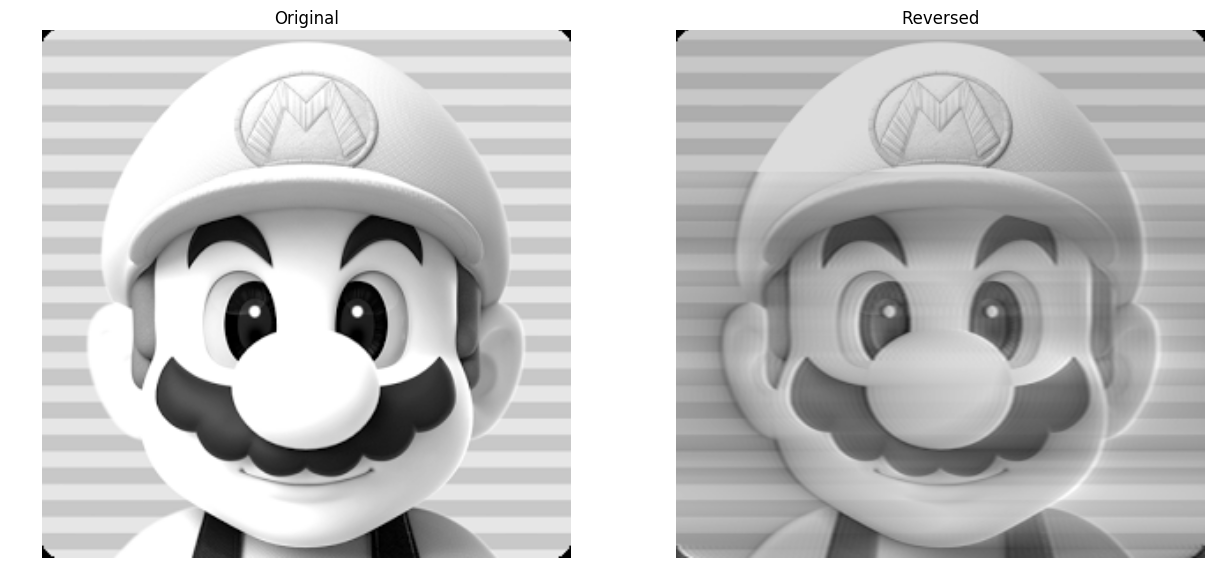

In [63]:
from scipy import signal

img = mpimg.imread('i/super_mario_head.png')
kernel = np.outer(signal.gaussian(3, 2), signal.gaussian(3, 2))
blurred = signal.fftconvolve(img[:,:,0], kernel)

# image in frequency domain
fft_original = np.fft.rfft2(img)

# discarding some coefficients
for x in range(300):
    for y in range(300):
        discard_x = x > 80
        discard_y = y > 80
        
        if discard_x and discard_y:
            fft_original[x,y] = 0
            
# reverse from frequency to spatial
i_fft_original = np.fft.irfft2(fft_original)

f, (plt1, plt2) = plt.subplots(1, 2, figsize=(15,15))

#plt1.axis('on');plt1.set_title('Spatial domain');plt1.imshow(kernel);
plt1.axis('off');plt1.set_title('Original');plt1.imshow(img[:,:,0], cmap='gray');


plt2.axis('off');plt2.set_title('Reversed');plt2.imshow(i_fft_original[:,:,0], cmap='gray');